# Detección de maduración de tomates

## Imports

In [1]:
import sys, os, distutils.core
from IPython.display import clear_output

!python -m pip install pyyaml==5.1
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))
clear_output()

In [2]:
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from IPython import display
import PIL
import matplotlib.pyplot as plt
import shutil

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.structures import BoxMode

SEED = 10
THRESHOLD = 0.8

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!git clone 'https://github.com/vazuniga1/Taller-grupo4.git'

Cloning into 'Taller-grupo4'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (655/655), done.
remote: Total 668 (delta 36), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (668/668), 173.77 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (563/563), done.


In [8]:
register_coco_instances(f"tomato_dataset_train", {},
                        f"Taller-grupo4/dataset/annotations/tomatOD_train.json",
                        f"Taller-grupo4/dataset/images/train")

register_coco_instances(f"tomato_dataset_test", {},
                        f"Taller-grupo4/dataset/annotations/ADJUSTED_tomatOD_test.json",
                        f"Taller-grupo4/dataset/images/val")

my_dataset_test_metadata = MetadataCatalog.get("tomato_dataset_test")
dataset_dicts = DatasetCatalog.get("tomato_dataset_test")

[06/27 01:33:47 d2.data.datasets.coco]: Loaded 55 images in COCO format from Taller-grupo4/dataset/annotations/ADJUSTED_tomatOD_test.json


## Test

In [4]:
target_folder = '/content/output/'
source_folder = '/content/drive/MyDrive/11vo-Semestre/Taller/intento-2/'
shutil.copytree(source_folder, target_folder)

'/content/output/'

In [21]:
cfg = get_cfg()

EPOCHS = 2_700
NUM_CLASSES = 3
BASE_LR = 0.001 # aca era 0.0001

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = THRESHOLD
predictor = DefaultPredictor(cfg)

[06/27 01:37:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [22]:
def prediccion_random(image_path):
  """
  Se realiza una predicción de una foto de un tomate introducida.
  Se retorna la foto del tomate con las bounding box predecidas

  Params:
  image_path: Path de la foto del tomate
  """
  # Se lee la imagen
  image = cv2.imread(image_path)

  # Realizamos la prediccion
  outputs = predictor(image)

  # Visualizamos los resultados
  v = Visualizer(image, metadata= my_dataset_test_metadata, scale=3)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  out_img = cv2.cvtColor(out.get_image(), cv2.COLOR_BGR2RGB)

  # Se lee la imagen original
  original_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Se plotea
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  ax1.imshow(original_img)
  ax1.set_title('Original')
  ax1.axis('off')
  ax2.imshow(out_img)
  ax2.set_title('Predicción')
  ax2.axis('off')
  plt.tight_layout()
  plt.show()

  # Retornamos el resultado
  return out_img

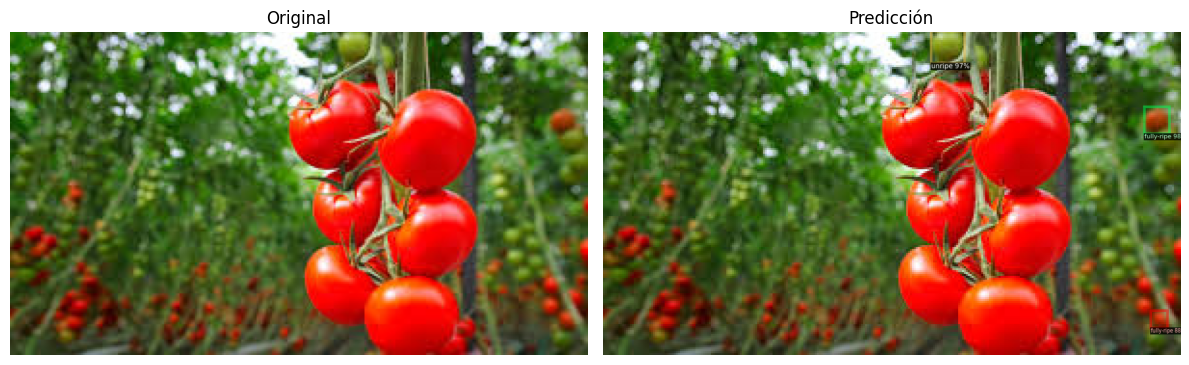

In [23]:
ex1 = prediccion_random("/content/images (1).jfif")

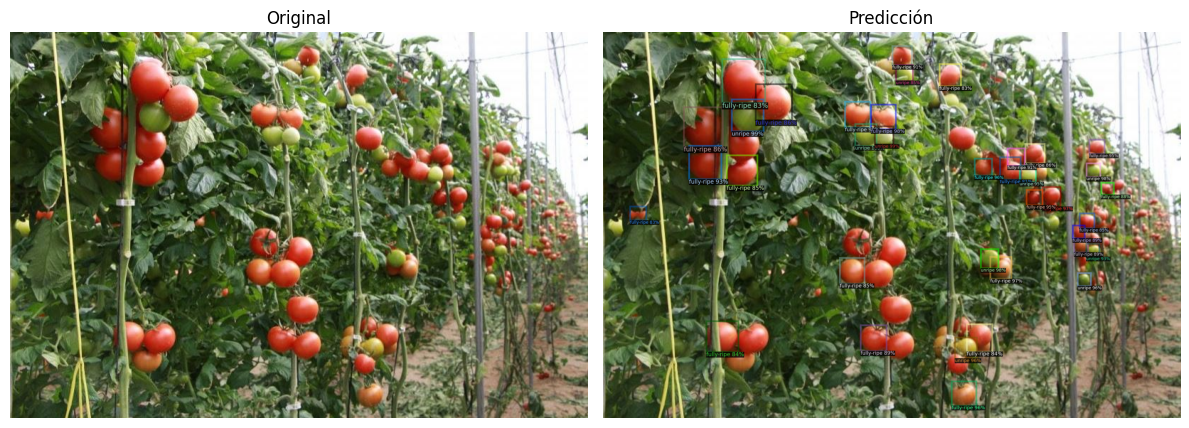

In [ ]:
ex2 = prediccion_random("/content/tomates.jpg")

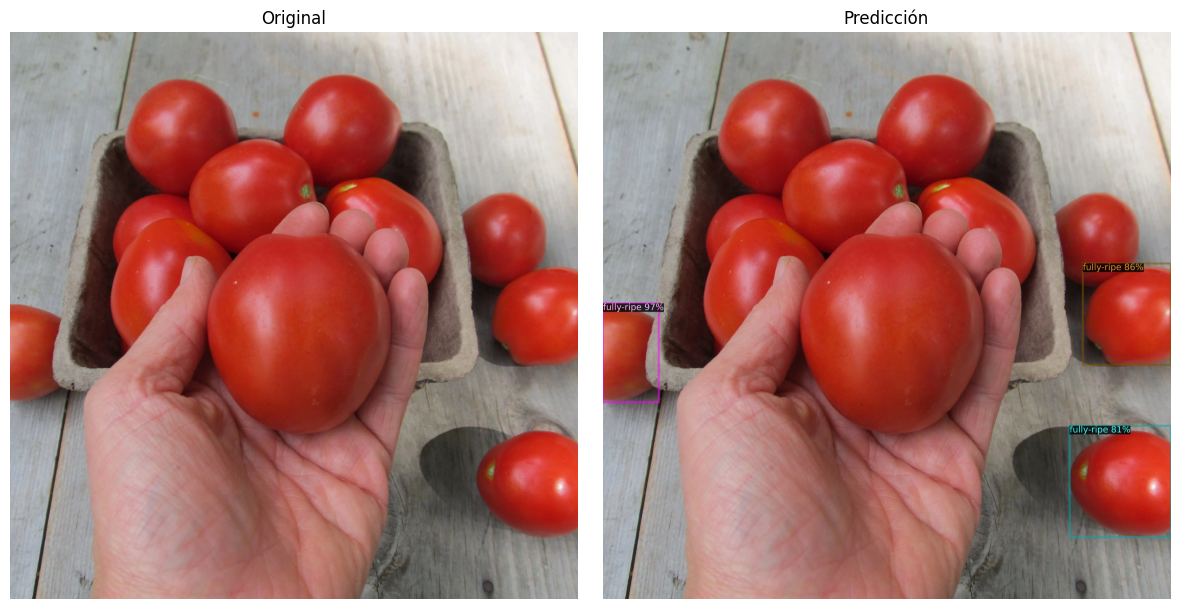

In [ ]:
ex4 = prediccion_random("/content/tomatess.webp")

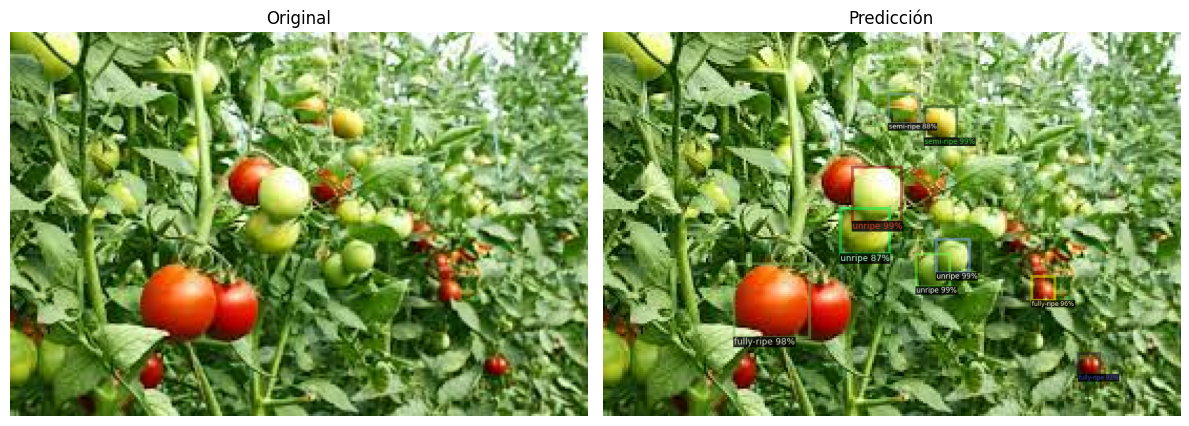

In [ ]:
ex5 = prediccion_random("/content/images.jpeg")

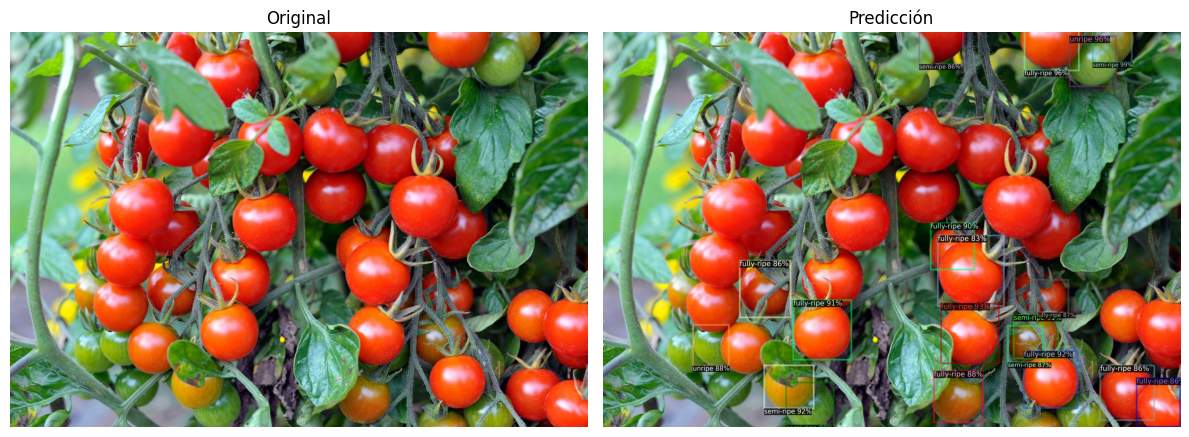

In [ ]:
ex6 = prediccion_random("/content/bC3PaydhcXxKMFYn3ZuMj5.jpg")